# Finding Shapes

In [21]:
(ns thriving-drylands
  (:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

nil

In [22]:
(defn approx [c]
  (let[m2f (new-matofpoint2f (.toArray c))
       len (arc-length m2f true)
       ret (new-matofpoint2f)
       app (approx-poly-dp m2f ret (* 0.02 len) true)]
    ret))


#'thriving-drylands/approx

In [23]:
(defn how-many-sides[c]
  (let[nb-sides (.size (.toList  (approx c)))]
    nb-sides))

#'thriving-drylands/how-many-sides

In [24]:
(defn which-color[c]
  (condp = (how-many-sides c)
   1 rgb/pink
   2 rgb/magenta
   3 rgb/green
   4 rgb/blue
   5rgb/yellow-1
   6 rgb/cyan-2
   rgb/orange)
  )

#'thriving-drylands/which-color

In [25]:
(defn draw-contours! [img contours]
 (dotimes [i (.size contours)]
    (let [c (.get contours i)]
	 (draw-contours img contours i (which-color c) 3)))
   img)

#'thriving-drylands/draw-contours!

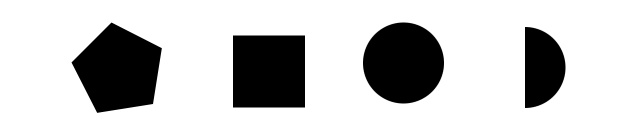

In [26]:
(def shapes 
  (-> "resources/morph/shapes3.jpg" (imread IMREAD_REDUCED_COLOR_2)))

(u/>>> shapes)

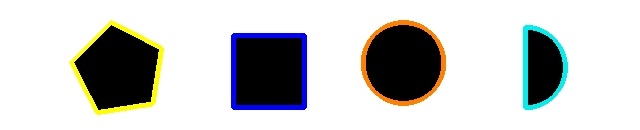

In [27]:
(defn draw-contours! [img contours]
 (dotimes [i (.size contours)]
    (let [c (.get contours i)]
	 (draw-contours img contours i (which-color c) 3)))
   img)


(def thresh (-> shapes clone (cvt-color! COLOR_BGR2GRAY) (threshold! 210 240 1)))
(u/>>> thresh)
(def contours (new-arraylist))

(find-contours thresh contours (new-mat) RETR_LIST CHAIN_APPROX_SIMPLE)
    (-> shapes
      (draw-contours! contours)
      (u/>>>))

### Hand Drawn Shapes

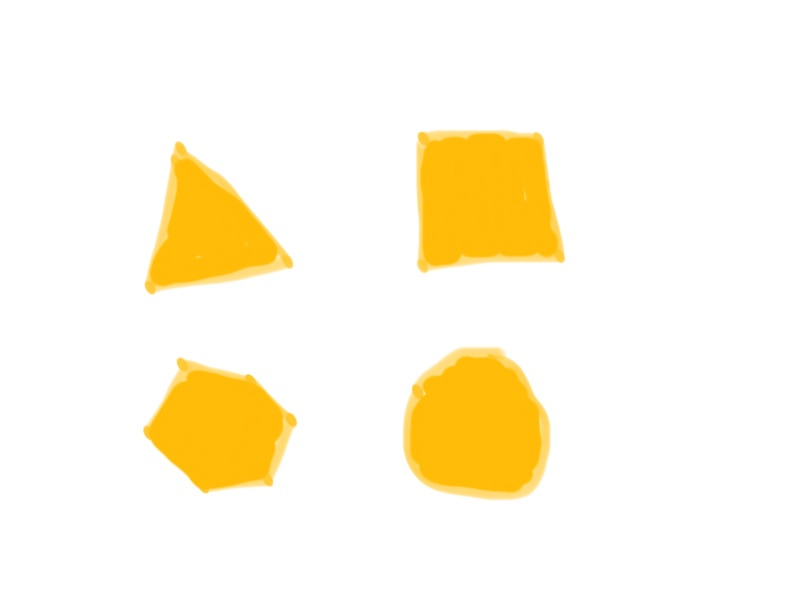

In [28]:
(def shapes2
  (-> "resources/chapter03/hand_shapes.jpg" (imread IMREAD_REDUCED_COLOR_2)))
(u/>>> shapes2)